# ----------------------------YOLOv8----------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Install YOLOv8

In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


In [ ]:
!pip install ultralytics==8.0.28

from ultralytics import YOLO
from IPython.display import display, Image

### Custom Training

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data="/content/drive/MyDrive/TCC/dataset_peixes/datasetYOLOv8/data.yaml"
      epochs=250 imgsz=640 project="/content/drive/MyDrive/TCC/YOLOv8/modeloV2"

### Validate Custom Model

In [ ]:
!yolo task=segment mode=val model='/content/drive/MyDrive/TCC/YOLOv8/modeloV2/train/weights/best.pt' data='/content/drive/MyDrive/TCC/dataset_peixes/datasetYOLOv8/data.yaml'

### Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model='/content/drive/MyDrive/TCC/YOLOv8/modeloV2/train/weights/best.pt' conf=0.25 source='/content/IMG_20230602_112536_jpg.rf.b83b6b029eb64607809513a1e0352b8a.jpg' save=true

# ---------------------------------Estimativa da Largura-----------------------------------

In [ ]:
model = YOLO("/content/drive/MyDrive/TCC/YOLOv8/modeloV2/train/weights/best.pt")

### Comprimento segmentado


image 1/1 /content/IMG_20230602_113416.jpg: 512x640 3 Tilapia-Fishs, 1292.7ms
Speed: 4.2ms pre-process, 1292.7ms inference, 22.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
4 labels saved to runs/segment/predict/labels


Quantidade de peixes: 3
Comprimento médio: 13.76


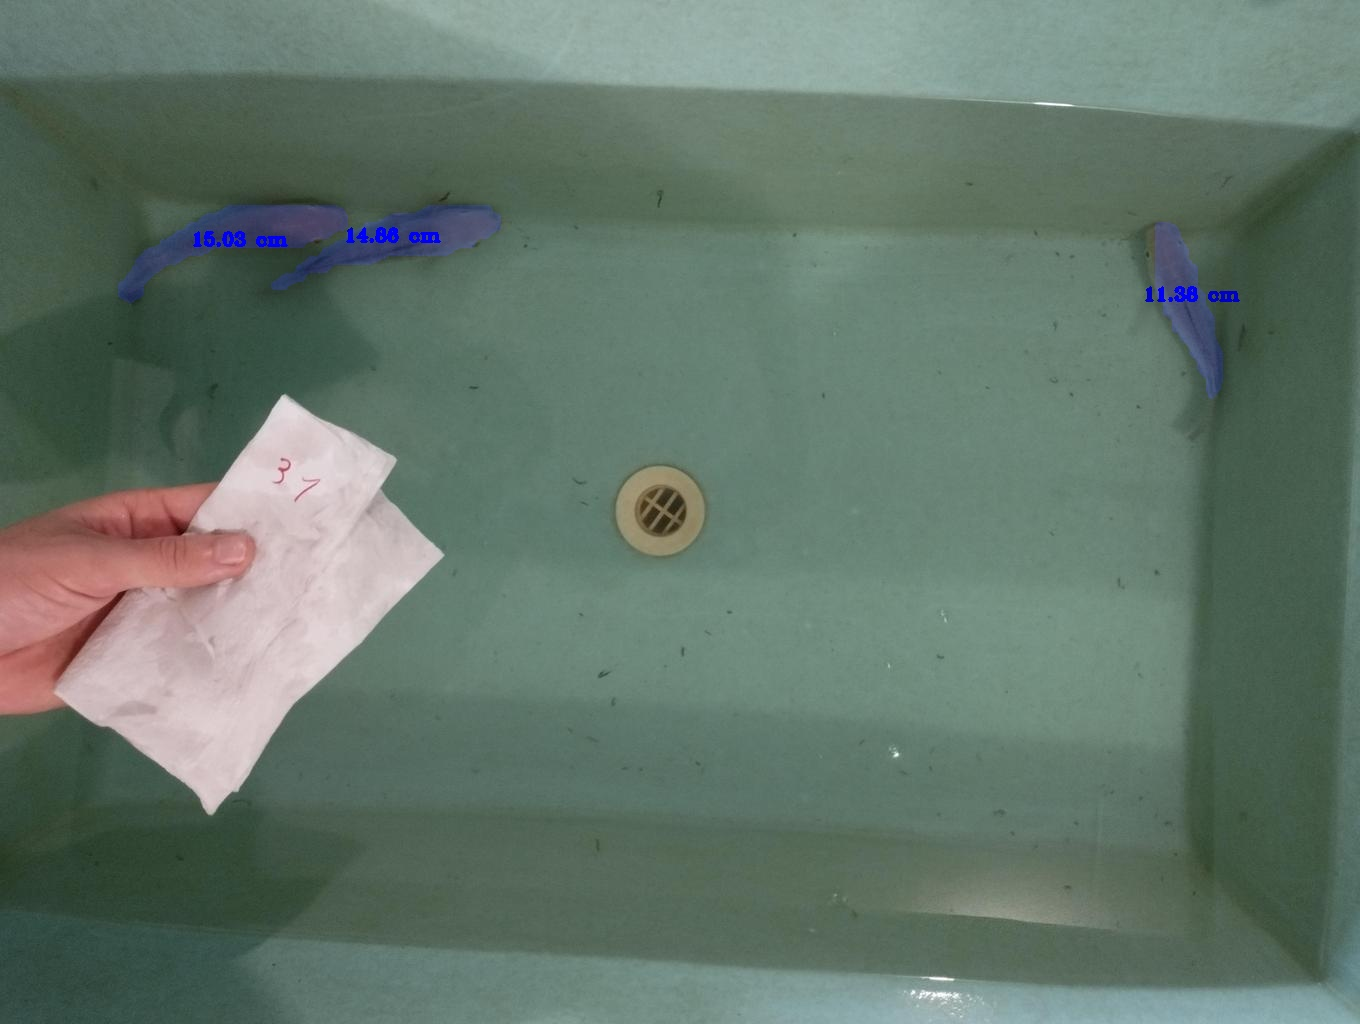

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

# Definir caminho da imagem
image_path = "/content/IMG_20230602_113416.jpg"

# Realizar previsão
predict = model.predict(image_path, save=True, save_txt=True)

# Carregar a imagem original
imagem_original = cv2.imread(image_path)

# Inicializar variáveis
media_cm_tanque = 0
contador_peixes = 0

# Processar cada máscara segmentada
for i, mascara in enumerate(predict[0].masks.segments):
    # Obter as coordenadas x e y da máscara
    x = (mascara[:, 0] * imagem_original.shape[1]).astype("int")
    y = (mascara[:, 1] * imagem_original.shape[0]).astype("int")

    # Verificar se as dimensões das máscaras correspondem à imagem original
    if x.size > 0 and y.size > 0:
        # Encontrar os dois pontos mais distantes em paralelo
        distancia_maxima = 0
        ponto1 = None
        ponto2 = None

        for j in range(len(x)):
            for k in range(j + 1, len(x)):
                distancia = np.linalg.norm(np.array([x[j], y[j]]) - np.array([x[k], y[k]]))
                if distancia > distancia_maxima:
                    distancia_maxima = distancia
                    ponto1 = np.array([x[j], y[j]])
                    ponto2 = np.array([x[k], y[k]])

        # Calcular o comprimento em centímetros
        relacao_pixels_centimetros = 243  # Relação entre pixels e centímetros
        tamanho_centimetros = 15.2  # Tamanho em centímetros correspondente a 'relacao_pixels_centimetros'

        distancia_pixels = distancia_maxima  # Distância em pixels calculada anteriormente
        distancia_centimetros = (distancia_pixels / relacao_pixels_centimetros) * tamanho_centimetros

        # Calcular o ponto médio entre os dois pontos
        ponto_medio = (ponto1 + ponto2) // 2

        # Exibir o comprimento em centímetros na imagem original
        if distancia_centimetros > 5.0:
            texto = f"{distancia_centimetros:.2f} cm"
            tamanho_texto, _ = cv2.getTextSize(texto, cv2.FONT_HERSHEY_TRIPLEX, 0.5, 2)
            ponto_texto = (ponto_medio[0] - tamanho_texto[0] // 2, ponto_medio[1] - 10)
            cv2.putText(imagem_original, texto, ponto_texto, cv2.FONT_HERSHEY_TRIPLEX, 0.6, (200, 0, 0), 2)
            contador_peixes += 1
            media_cm_tanque += distancia_centimetros

        # Desenhar uma linha entre os dois pontos mais distantes
        cv2.line(imagem_original, tuple(ponto1), tuple(ponto2), (212, 255, 127), 2)

        # Definir um valor de canal alfa de 0 para a cor de preenchimento (verde claro totalmente transparente)
        cor_preenchimento = (50, 0, 0, 0)  # Cor para o preenchimento da segmentação do objeto (verde claro totalmente transparente)

        # Criar uma imagem em branco com o mesmo tamanho e tipo da imagem original
        imagem_transparente = np.zeros_like(imagem_original, dtype=np.uint8)

        # Desenhar a segmentação do YOLOv8 na imagem transparente
        cv2.polylines(imagem_transparente, [np.vstack((x, y)).T], isClosed=True, color=cor_preenchimento, thickness=2)
        cv2.fillPoly(imagem_transparente, [np.vstack((x, y)).T], color=cor_preenchimento)

        # Compor a imagem transparente sobre a imagem original
        imagem_original = cv2.add(imagem_original, imagem_transparente)

# Calcular a média do comprimento dos peixes
peixes_tanque = f"{media_cm_tanque / contador_peixes:.2f}"

# Exibir informações
print("Quantidade de peixes:", contador_peixes)
print("Comprimento médio:", peixes_tanque)

# Salvar a imagem com as distâncias em um arquivo temporário
output_file = "/content/output.jpg"
cv2.imwrite(output_file, imagem_original)

# Exibir a imagem usando o módulo IPython.display
display(Image(filename=output_file))


### Comprimento segmentado com a linha entre os dois pontos


image 1/1 /content/IMG_20230602_112536_jpg.rf.b83b6b029eb64607809513a1e0352b8a.jpg: 512x640 28 Tilapia-Fishs, 3945.0ms
Speed: 1.3ms pre-process, 3945.0ms inference, 589.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
2 labels saved to runs/segment/predict/labels


Quantidade de peixes: 28
Comprimento médio: 12.07


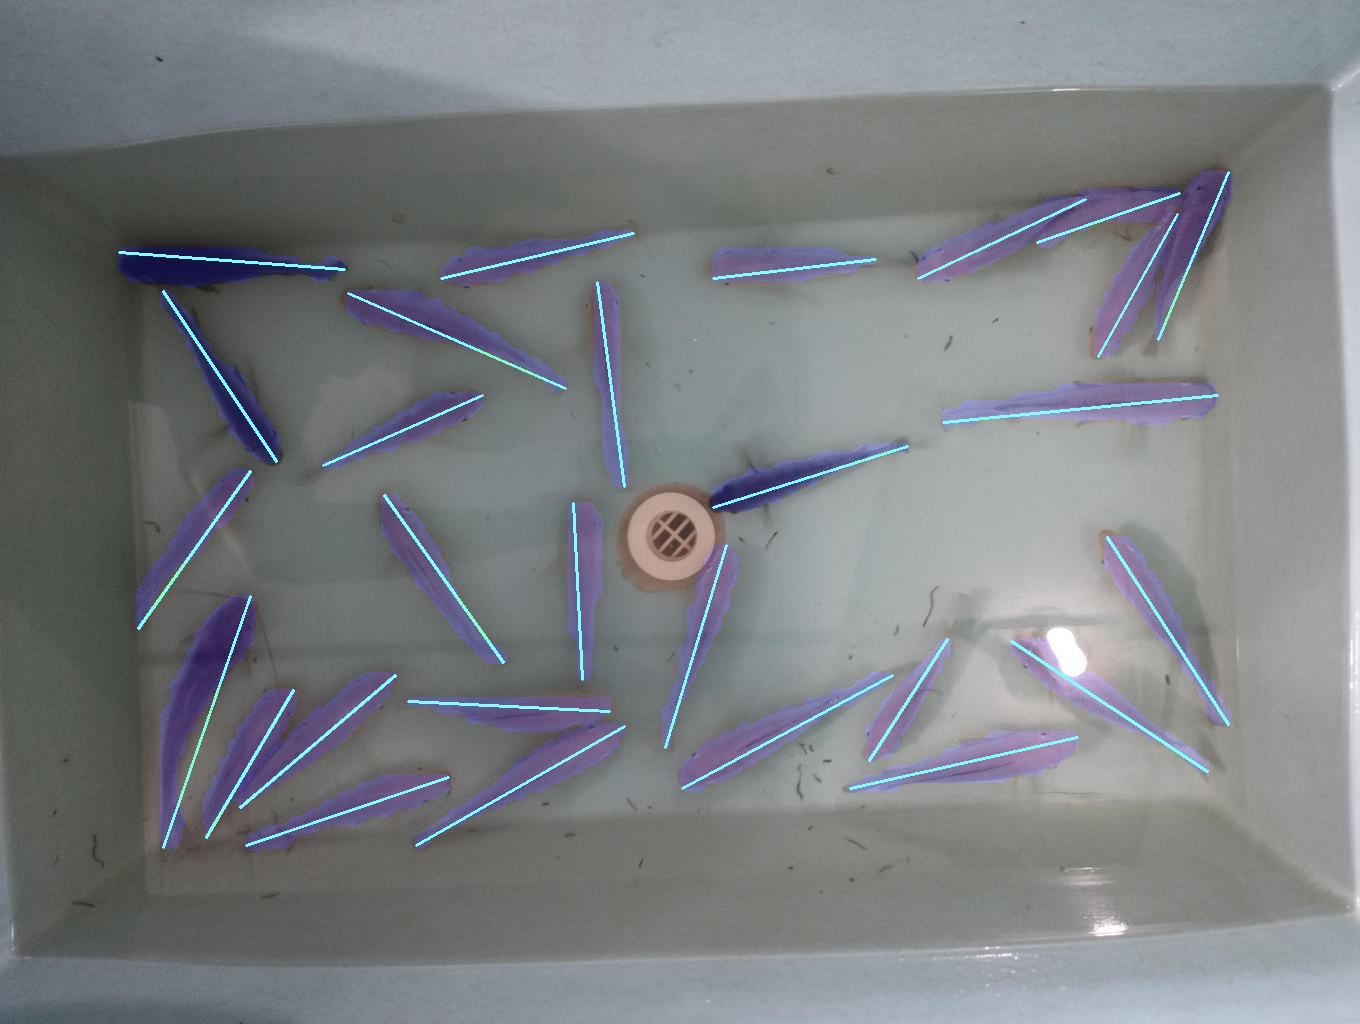

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

# Definir caminho da imagem
image_path = "/content/IMG_20230602_112536_jpg.rf.b83b6b029eb64607809513a1e0352b8a.jpg"

# Carregar a imagem original
imagem_original = cv2.imread(image_path)

# Realizar previsão
predict = model.predict(image_path, save=True, save_txt=True)


# Inicializar variáveis
media_cm_tanque = 0
contador_peixes = 0

# Processar cada máscara segmentada
for i, mascara in enumerate(predict[0].masks.segments):
    # Obter as coordenadas x e y da máscara
    x = (mascara[:, 0] * imagem_original.shape[1]).astype("int")
    y = (mascara[:, 1] * imagem_original.shape[0]).astype("int")

    # Verificar se as dimensões das máscaras correspondem à imagem original
    if x.size > 0 and y.size > 0:
        # Encontrar os dois pontos mais distantes em paralelo
        distancia_maxima = 0
        ponto1 = None
        ponto2 = None

        for j in range(len(x)):
            for k in range(j + 1, len(x)):
                distancia = np.linalg.norm(np.array([x[j], y[j]]) - np.array([x[k], y[k]]))
                if distancia > distancia_maxima:
                    distancia_maxima = distancia
                    ponto1 = np.array([x[j], y[j]])
                    ponto2 = np.array([x[k], y[k]])

        # Calcular o comprimento em centímetros
        relacao_pixels_centimetros = 257  # Relação entre pixels e centímetros
        tamanho_centimetros = 15.2  # Tamanho em centímetros correspondente a 'relacao_pixels_centimetros'

        distancia_pixels = distancia_maxima  # Distância em pixels calculada anteriormente
        distancia_centimetros = (distancia_pixels / relacao_pixels_centimetros) * tamanho_centimetros

        # Calcular o ponto médio entre os dois pontos
        ponto_medio = (ponto1 + ponto2) // 2

        # Exibir o comprimento em centímetros na imagem original
        if distancia_centimetros > 5.0:
            texto = f"{distancia_centimetros:.2f} cm"
            tamanho_texto, _ = cv2.getTextSize(texto, cv2.FONT_HERSHEY_TRIPLEX, 0.5, 2)
            ponto_texto = (ponto_medio[0] - tamanho_texto[0] // 2, ponto_medio[1] - 10)
            cv2.putText(imagem_original, texto, ponto_texto, cv2.FONT_HERSHEY_TRIPLEX, 0.6, (200, 0, 0), 2)
            contador_peixes += 1
            media_cm_tanque += distancia_centimetros

        # Desenhar uma linha entre os dois pontos mais distantes
        cv2.line(imagem_original, tuple(ponto1), tuple(ponto2), (212, 255, 127), 2)

        # Definir um valor de canal alfa de 0 para a cor de preenchimento (verde claro totalmente transparente)
        cor_preenchimento = (50, 0, 0, 0)  # Cor para o preenchimento da segmentação do objeto (verde claro totalmente transparente)

        # Criar uma imagem em branco com o mesmo tamanho e tipo da imagem original
        imagem_transparente = np.zeros_like(imagem_original, dtype=np.uint8)

        # Desenhar a segmentação do YOLOv8 na imagem transparente
        cv2.polylines(imagem_transparente, [np.vstack((x, y)).T], isClosed=True, color=cor_preenchimento, thickness=2)
        cv2.fillPoly(imagem_transparente, [np.vstack((x, y)).T], color=cor_preenchimento)

        # Compor a imagem transparente sobre a imagem original
        imagem_original = cv2.add(imagem_original, imagem_transparente)

# Calcular a média do comprimento dos peixes
peixes_tanque = f"{media_cm_tanque / contador_peixes:.2f}"

# Exibir informações
print("Quantidade de peixes:", contador_peixes)
print("Comprimento médio:", peixes_tanque)

# Salvar a imagem com as distâncias em um arquivo temporário
output_file = "/content/output.jpg"
cv2.imwrite(output_file, imagem_original)

# Exibir a imagem usando o módulo IPython.display
display(Image(filename=output_file))
